In [2]:
%matplotlib inline
from config_calc import *
import grid_tools

from collections import OrderedDict

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

#import cmocean
import matplotlib.pyplot as plt

In [3]:
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

droot = os.path.join(os.path.dirname(gv.flight_file[0]),'..','cesm_flight_data')

data = {}
for i,flight in enumerate(gv.flight):
    file_in = '.'.join([case,os.path.basename(gv.flight_file[i])])
    file_in = os.path.join(droot,file_in)
    data[flight] = xr.open_dataset(file_in)
    
data['ORCASrf01']

<xarray.Dataset>
Dimensions:   (time: 2723)
Coordinates:
  * time      (time) datetime64[ns] 2016-01-15T12:57:26.000000043 ...
Data variables:
    O2_OCN    (time) float64 ...
    CO2_T09k  (time) float64 ...
    aO2_GKA   (time) float64 ...
    CO2_C15O  (time) float64 ...
    CO2_LND   (time) float64 ...
    U10       (time) float64 ...
    CO2_T09   (time) float64 ...
    PS        (time) float64 ...
    CO2_T09b  (time) float64 ...
    CO2_T09c  (time) float64 ...
    CO2_T09d  (time) float64 ...
    CO2_T09e  (time) float64 ...
    CO2_T09f  (time) float64 ...
    CO2_T09g  (time) float64 ...
    CO2_T09h  (time) float64 ...
    CO2_T09i  (time) float64 ...
    CO2_T09j  (time) float64 ...
    CO2_CROF  (time) float64 ...
    CO2_T09l  (time) float64 ...
    CO2_OCN   (time) float64 ...
    CO2_CROT  (time) float64 ...
    Pm        (time) float64 ...
    OMEGA     (time) float64 ...
    CO2_L14C  (time) float64 ...
    Z3        (time) float64 ...
    PBLH      (time) float64 ...

TypeError: invalid type promotion

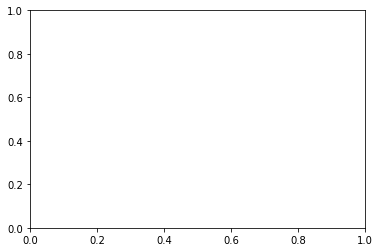

In [17]:
min15 = np.timedelta64(15,'m')
v = 'O2_OCN'
for f in gv.flight:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sc = ax.scatter(data[f].time.astype('datetime64[h]'),
                    data[f].Pm.values,c=data[f][v].values)

    ax.set_xlim([data[f].time.values[0]-min15,data[f].time.values[-1]+min15])
    ax.set_ylim(ax.get_ylim()[::-1])
    fig.autofmt_xdate()

    ax.set_ylabel('Pressure [hPa]')
    ax.set_title(f.upper(),loc='left')
    ax.set_title(v,loc='right')
    plt.colorbar(sc)

In [ ]:
ds = xr.open_dataset('/glade/p/work/mclong/orcas/flt_mdl_col/ORCASrf02-merge10_points_bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004.cam.h0.CO2_OCN.20070101-20160229.nc')
tracer_def = cesm.trace_gas_tracers(case)
ds

In [ ]:
ds.CO2_OCN_b13geos5.values = tracer_def['CO2_OCN']['convert'](ds.CO2_OCN_b13geos5.values)
ds.CO2_OCN_b13geos5.plot()

In [ ]:
f = 'ORCASrf02'
data[f].CO2_OCN.plot()

In [ ]:
ds = xr.open_dataset('/glade/p/work/mclong/orcas/gv_merged_data/ORCASrf02.merge10.20170526.nc')
ds.CO2_OCN_FMPD.plot()

In [ ]:
data[f].CO2_OCN.plot()

In [ ]:
 np.issubdtype(data[f].time.dtype, np.datetime64)

In [ ]:
d